# WeatherPy
----

In [55]:
# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
!pip install ratelimit  # this library is to limit rate of API requests to 60 per minute
from ratelimit import limits, sleep_and_retry

# import API key
from api_keys import api_key

# use citipy library to determine city name based on latitude and longitude
from citipy import citipy

# output File (CSV)
output_data_file = "output_data/cities.csv"

# range of latitudes and range of longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# list for holding latitudes/longitudes and cities
lat_lngs = []
cities = []

# create a set of random latitudes and longitudes combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each latitude/longitude combination
# Note: I made a slight modification to the starter code.
#       Since there might be several cities with the same name either
#       in the same country or in a different country, I built the cities
#       list by comparing the full object properties and not just city_name.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [66]:
# call_api is a decorated function that uses the sleep_and_retry decorator in
# the ratelimit library to limit the amount of API calls to no more than sixty per minute.
# Once the limit is hit we put the thread to sleep and retry once the one minute period is over.
ONE_MINUTE = 60
@sleep_and_retry
@limits(calls=60, period=ONE_MINUTE)
def call_api(url):
    response = requests.get(url)
    return response

url = 'http://api.openweathermap.org/data/2.5/weather?appid=' + api_key + "&units=imperial&q="
response_json = []  # this will store the concatenated json responses for the cities weather data
print('Beginning Data Retrieval')
print('----------------------------`-')

# iterate thru cities list to get weather data from OpenWeather by using their API
for city in cities:
    print(f'Processing Record {cities.index(city)+1} of {len(cities)} | {city.city_name}, {city.country_code}', end='')
    response = call_api(url + city.city_name + ',' + city.country_code)
    if response.status_code == 200:
        response_json.append(response.json())
        print('')  # move to next line in print log
    elif response.status_code == 404:
        print('  <404 response received: city not found!>')
    elif response.status_code == 429:
        raise Exception('<429 response received... OpenWeatherMap API call rate limit was exceeded!>')
    else:
        raise Exception('<{} response received>'.format(response.status_code))


Beginning Data Retrieval
----------------------------`-
Processing Record 1 of 598 | atuona, pf
Processing Record 2 of 598 | rikitea, pf
Processing Record 3 of 598 | mrirt, ma  <404 response received: city not found!>
Processing Record 4 of 598 | poum, nc
Processing Record 5 of 598 | lebu, cl
Processing Record 6 of 598 | ushuaia, ar
Processing Record 7 of 598 | kapaa, us
Processing Record 8 of 598 | hithadhoo, mv
Processing Record 9 of 598 | tilichiki, ru
Processing Record 10 of 598 | carballo, es
Processing Record 11 of 598 | tuktoyaktuk, ca
Processing Record 12 of 598 | samalaeulu, ws  <404 response received: city not found!>
Processing Record 13 of 598 | albany, au
Processing Record 14 of 598 | waipawa, nz
Processing Record 15 of 598 | yichang, cn
Processing Record 16 of 598 | tsihombe, mg  <404 response received: city not found!>
Processing Record 17 of 598 | suaita, co
Processing Record 18 of 598 | mataura, pf  <404 response received: city not found!>
Processing Record 19 of 598 |

Processing Record 164 of 598 | loknya, ru
Processing Record 165 of 598 | thinadhoo, mv
Processing Record 166 of 598 | muli, mv
Processing Record 167 of 598 | ranong, th
Processing Record 168 of 598 | isangel, vu
Processing Record 169 of 598 | haines junction, ca
Processing Record 170 of 598 | chuy, uy
Processing Record 171 of 598 | grindavik, is
Processing Record 172 of 598 | amderma, ru  <404 response received: city not found!>
Processing Record 173 of 598 | stanghelle, no
Processing Record 174 of 598 | le port, re
Processing Record 175 of 598 | thompson, ca
Processing Record 176 of 598 | sitka, us
Processing Record 177 of 598 | cockburn town, tc
Processing Record 178 of 598 | naze, jp
Processing Record 179 of 598 | yilan, cn
Processing Record 180 of 598 | victoria, sc
Processing Record 181 of 598 | axim, gh
Processing Record 182 of 598 | pochutla, mx
Processing Record 183 of 598 | myre, no
Processing Record 184 of 598 | sanandaj, ir
Processing Record 185 of 598 | bambous virieux, mu


Processing Record 335 of 598 | caluquembe, ao
Processing Record 336 of 598 | ussel, fr
Processing Record 337 of 598 | hollola, fi
Processing Record 338 of 598 | marawi, sd
Processing Record 339 of 598 | san andres, co
Processing Record 340 of 598 | pisco, pe
Processing Record 341 of 598 | lucea, jm
Processing Record 342 of 598 | umm jarr, sd  <404 response received: city not found!>
Processing Record 343 of 598 | lalmohan, bd
Processing Record 344 of 598 | golfito, cr
Processing Record 345 of 598 | alvorada, br
Processing Record 346 of 598 | burica, pa  <404 response received: city not found!>
Processing Record 347 of 598 | ngunguru, nz
Processing Record 348 of 598 | port hedland, au
Processing Record 349 of 598 | kuryk, kz
Processing Record 350 of 598 | vilyuysk, ru
Processing Record 351 of 598 | esperance, au
Processing Record 352 of 598 | longlac, ca  <404 response received: city not found!>
Processing Record 353 of 598 | san carlos de bariloche, ar
Processing Record 354 of 598 | pe

Processing Record 506 of 598 | kaeo, nz
Processing Record 507 of 598 | zhigalovo, ru
Processing Record 508 of 598 | boende, cd
Processing Record 509 of 598 | kotma, in
Processing Record 510 of 598 | torbay, ca
Processing Record 511 of 598 | waingapu, id
Processing Record 512 of 598 | nizhneyansk, ru  <404 response received: city not found!>
Processing Record 513 of 598 | copiapo, cl
Processing Record 514 of 598 | kadnikov, ru
Processing Record 515 of 598 | taguatinga, br
Processing Record 516 of 598 | tessalit, ml
Processing Record 517 of 598 | nisia floresta, br
Processing Record 518 of 598 | san cristobal, ec
Processing Record 519 of 598 | weihai, cn
Processing Record 520 of 598 | tadine, nc
Processing Record 521 of 598 | ukiah, us
Processing Record 522 of 598 | xining, cn
Processing Record 523 of 598 | beaverlodge, ca
Processing Record 524 of 598 | agar, in
Processing Record 525 of 598 | sinjai, id
Processing Record 526 of 598 | bongor, td
Processing Record 527 of 598 | hamburg, us


## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [96]:
weather_list = []
for record in response_json:
    weather_list.append({
                         'City': record['name'],
                         'Country': record['sys']['country'],
                         'Lat': record['coord']['lat'],
                         'Lng': record['coord']['lon'],
                         'Date': datetime.utcfromtimestamp(record['dt']).strftime('%Y-%m-%dT%H:%M:%SZ'),
                         'Max Temp': record['main']['temp_max'],
                         'Humidity': record['main']['humidity'],
                         'Cloudiness': record['clouds']['all'],
                         'Wind Speed': record['wind']['speed']
                        })

weather_df = pd.DataFrame(weather_list, columns=['City', 'Country', 'Lat', 'Lng', 'Date',
                                                 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed'])
weather_df.to_csv(output_data_file)
weather_df.head()
weather_df[weather_df['Humidity']>100]

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
202,Iquitos,PE,-3.75,-73.25,2019-06-30T16:31:00Z,42.8,319,75,5.82
468,Paita,PE,-5.09,-81.11,2019-06-30T16:35:59Z,62.6,290,0,19.46


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

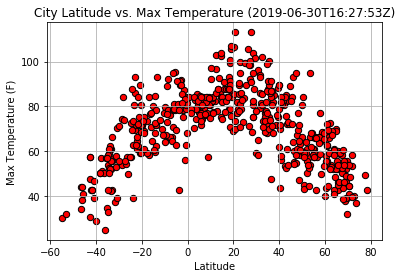

In [91]:
fig, ax = plt.subplots()
weather_df.plot(kind='scatter', x='Lat', y='Max Temp', s=40,
            marker='o', color='red', edgecolors='black', ax=ax)
ax.set_title(f'City Latitude vs. Max Temperature ({weather_df.iloc[0, 4]})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
ax.grid()

### Latitude vs. Humidity Plot

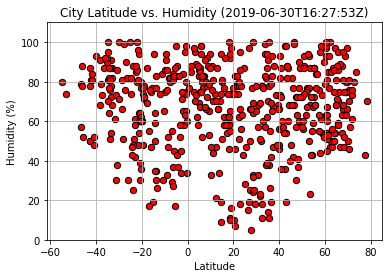

In [100]:
fig, ax = plt.subplots()
weather_df.plot(kind='scatter', x='Lat', y='Humidity', s=40,
            marker='o', color='red', edgecolors='black', ax=ax)
ax.set_title(f'City Latitude vs. Humidity ({weather_df.iloc[0, 4]})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_ylim(0, 110)
ax.grid()

### Latitude vs. Cloudiness Plot

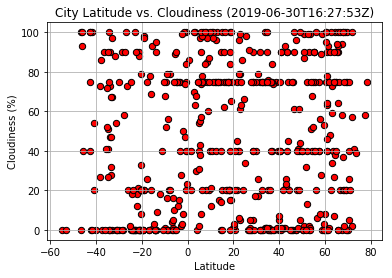

In [101]:
fig, ax = plt.subplots()
weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', s=40,
            marker='o', color='red', edgecolors='black', ax=ax)
ax.set_title(f'City Latitude vs. Cloudiness ({weather_df.iloc[0, 4]})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid()

### Latitude vs. Wind Speed Plot

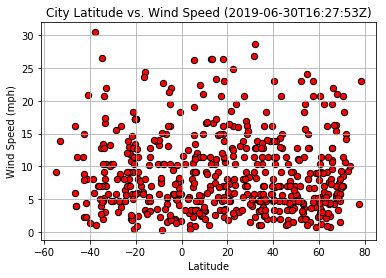

In [103]:
fig, ax = plt.subplots()
weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', s=40,
            marker='o', color='red', edgecolors='black', ax=ax)
ax.set_title(f'City Latitude vs. Wind Speed ({weather_df.iloc[0, 4]})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.grid()

----
## Analysis
1. There seems to be a correlation between temperature and latitude. Latitudes between -20 and 40 degrees seem to have higher temperatures than latitudes outside that range. This means the closer we get to the equator, the higher the temperature.
2. Humidity does not seem to have a dependency with latitude. This means there are other factors including temperature that can affect humidity such as proximity to water bodies that can contribute to the amount of water vapor in the atmosphere increasing the humidity.
3. Cloudiness seems to have no correlation with latitude either. However, it seems is uncommon to find cities with clear skies close to the equator at least for the day and time where the data was collected.